# Pandas Groupby explained with Titanic

## Group By: split-apply-combine
in many situations we want to split the data set into groups and do something with those groups. This is called "group by" process. Formally, by “group by” we are referring to a process involving one or more of the following steps:

* **Splitting** the data into groups based on some criteria. 
* **Applying** a function to each group independently. 
* **Combining** the results into a data structure, usually into DataFrame, or column which is Series.
<br>

Out of these, the split step is the most straightforward, usually we split by the different values of some feature.<br>
In the apply step, we might wish to one of the following:

* **Aggregation** functions like sum or count, statistical functions like mean or std and custom functions.

* **Transformation**: perform some group-specific computations and return a "list" of values - like-indexed object. For example to Filling Nan's within specific value to each group.

* **Filtration** discard some groups. For example, discard groups with only a few members. Filter outliers based on the group sum or mean.
<br>
Lets View examples for the above cases.As demonstration data, we use Titanic data. Download from kaggle, or use sample example from git.


Source: 
* https://pandas.pydata.org/pandas-docs/stable/groupby.html
* 

In [72]:
import os


import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.style.use('bmh')
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns


### Read CSV file
Read only the following features:
*   Survived: Survival (0 = no; 1 = yes)
*	Pclass: Passenger class (1 = first; 2 = second; 3 = third)
*	Sex: Sex
*	Age: Age
*	SibSp: Number of siblings/spouses aboard
*	Parch: Number of parents/children aboard
*	Fare: Passenger fare
*	Embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [46]:
cols = ['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
df= pd.read_csv('data.csv',usecols = cols)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [47]:
dfs = df.sample(300)
df.sample(300).to_csv('titanic_sample.csv', index=False)

### Group By: Splitting data  into groups - groupby
With pandas, we could naturally group by columns values. For that we call:
> ####  groupby() function returns a `GroupBy` object. 

In [48]:
grouped  = df.groupby('Sex')
print(type(grouped))
grouped.first()

<class 'pandas.core.groupby.groupby.DataFrameGroupBy'>


,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
Sex,,,,,,,
female,1,1,38.0,1,0,71.2833,C
male,0,3,22.0,1,0,7.2500,S


### Group By: split data apply function

`DataFrameGroupBy` object, is an indexing scheme of the data frame. It don't have the methods of data frame as info, columns etc. To get the values we need, we apply an aggregation function, as `mean()` or `sum()`, that returns **DataFrame** object. 

> ####  groupby().mean()  returns a `DataFrame` object. 



In [49]:
print(type(df.groupby('Sex').mean()))
df.groupby('Sex').mean().head()

<class 'pandas.core.frame.DataFrame'>


,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [50]:
print(type(df.groupby('Sex').sum()))
df.groupby('Sex').sum().head()

<class 'pandas.core.frame.DataFrame'>


,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,233,678,7286.00,218,204,13966.6628
male,109,1379,13919.17,248,136,14727.2865


We can plot the returned data frame.

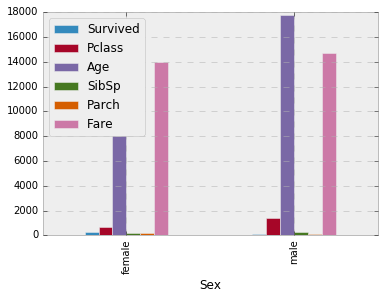

In [64]:
df.groupby('Sex').sum().plot(kind='bar');

#### The split-apply return data frame
In the returned data frame:
* the index are the values of the column by which we made the groupby.

We can access specific values in the returned data frame. 

In [52]:
print('groupby type:', type(grouped.mean()))
print('grouped.mean().columns:',grouped.mean().columns)
print('grouped.mean().columns.values: ', grouped.mean().columns.values)
print('grouped.mean().index: ', grouped.mean().index)
print('grouped.mean()[\'Age\'][\'female\']:',grouped.mean()['Age']['female'])
grouped.mean().head()

groupby type: <class 'pandas.core.frame.DataFrame'>
grouped.mean().columns: Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
grouped.mean().columns.values:  ['Survived' 'Pclass' 'Age' 'SibSp' 'Parch' 'Fare']
grouped.mean().index:  Index(['female', 'male'], dtype='object', name='Sex')
grouped.mean()['Age']['female']: 27.915708812260537


,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


Check null values in the original data frame

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


#### impute missing age values with the groupby mean
For example, to impute missing age values with the mean value specific to each Sex, do the following:

In [54]:
g_mean = df.groupby('Sex').mean()
df.loc[df.Age.isnull() & (df.Sex == 'female'),'Age'] = g_mean['Age']['female']
df.loc[df.Age.isnull() & (df.Sex == 'male'), 'Age'] = g_mean['Age']['male']

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [56]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Group by more then one column
Lets view surviving rate per Sex. To to that,we `groupby` on `Sex` and `Survive` columns.

In [57]:
df.groupby(['Sex', 'Survived'] )['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

We will get a data frame with 4 raws, each for any combination of the columns value. The index is a multi index of the combination of the unique values of the grouped by columns. The data frame has one column, with the count of rows, with those values.

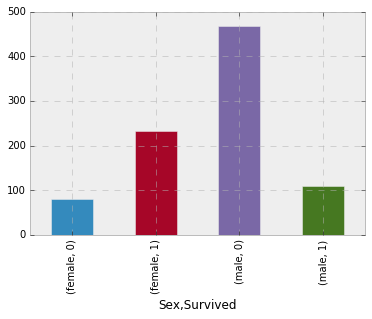

In [65]:
df.groupby(['Sex', 'Survived'] )['Survived'].count().plot.bar();

### Flatten after groupby 

This is not what we wanted, we want to see the inner distribution of survivors in each sex group. To do that, we will flatten the data frame, using unstack pandas method. <br>
> unstack method turns index values into column names.

In multi indexing, the index column to unstack, is passed as parameter. Can be given by name, or by position, `0` is the default.

In [59]:
df.groupby(['Sex', 'Survived'] )['Survived'].count().unstack('Sex')

Sex,female,male
Survived,,
0,81,468
1,233,109


In [60]:
df.groupby(['Sex', 'Survived'] )['Survived'].count().unstack(1)

Survived,0,1
Sex,,
female,81,233
male,468,109


Now we can visualize survivors distribution, by sex group.

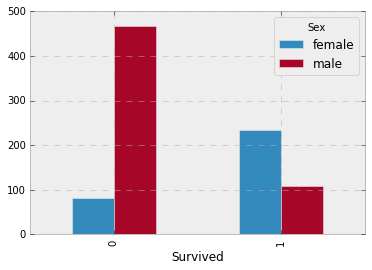

In [66]:
df_grouped = df.groupby(['Sex', 'Survived'] )['Survived'].count()
df_grouped.unstack(0).plot.bar();

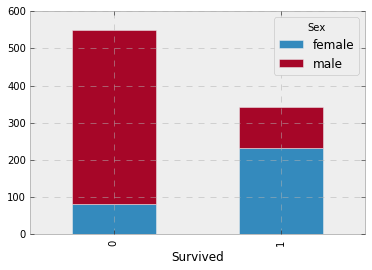

In [67]:
df_grouped.unstack(0).plot.bar(stacked=True);

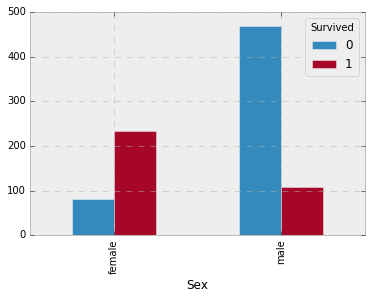

In [68]:
df.groupby(['Sex', 'Survived'] )['Survived'].count().unstack(1).plot.bar();

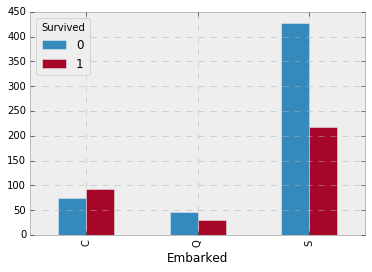

In [75]:
df.groupby(['Embarked', 'Survived'] )['Survived'].count().unstack(1).plot.bar();

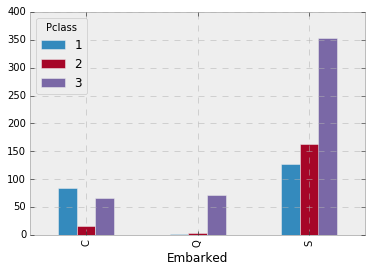

In [76]:
df.groupby(['Embarked', 'Pclass'] )['Pclass'].count().unstack(1).plot.bar();